## Necessary Libraries

In [1]:
# necessary libraries
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers

from keras.models import Model, Sequential
from keras import layers

import tensorflow as tf

## Check GPU

In [2]:
 tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3246337855043788732
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4172283904
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9910054663703789210
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


## Creating Datasets ( Augmented- Not Augmented)

In [4]:
#directories
training_dir="datasets/dl_datasets/sea_animals3/train"
validation_dir="datasets/dl_datasets/sea_animals3/validation"

# use this function for preparing data  
def prep_data(augmented,batch_size=16):      # if you want to augmented dat set use it like this : prep_data(True)
    if augmented:                            # default batch_size is 16 , you can change it 
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)
    
        validation_datagen = ImageDataGenerator(rescale=1./255)    

    else:
        train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
        validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # training set
    train_set = train_datagen.flow_from_directory(
        training_dir,
        target_size=(180, 180),  # The dimensions to which all images found will be resized
        batch_size=batch_size,# 32  default
        class_mode="sparse") # you can change this to onehotEncoded format or another format
         
    
    # validation set
    validation_set = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(180, 180),
        batch_size=batch_size,  # 32 default
        class_mode="sparse")
             
    return train_set , validation_set


## Function for Visualization of Model History

In [5]:
# visulization function for Models
def visualize(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    axs[0].plot(epochs, acc, 'r', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].legend()
    axs[0].grid(True)
    
    axs[1].plot(epochs, loss, 'r', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].legend()
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()


## Class Distribution

In [6]:
import os

# Eğitim ve doğrulama setlerinin dizinleri
train_dir = training_dir
validation_dir = validation_dir

# Eğitim setindeki sınıf dağılımını hesapla
train_class_counts = {}
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        train_class_counts[class_folder] = num_images

# Doğrulama setindeki sınıf dağılımını hesapla
validation_class_counts = {}
for class_folder in os.listdir(validation_dir):
    class_path = os.path.join(validation_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        validation_class_counts[class_folder] = num_images

print("Training set Distribution:")
print(train_class_counts)

print("Validation set Distribution:")
print(validation_class_counts)

Training set Distribution:
{'Clams': 347, 'Corals': 350, 'Crabs': 349, 'Dolphin': 547, 'Eel': 347, 'Fish': 345, 'Jelly Fish': 591, 'Lobster': 349, 'Nudibranchs': 350, 'Octopus': 393, 'Otter': 350, 'Penguin': 337, 'Puffers': 371, 'Sea Rays': 361, 'Sea Urchins': 405, 'Seahorse': 334, 'Seal': 289, 'Sharks': 413, 'Shrimp': 341, 'Squid': 338, 'Starfish': 349, 'Turtle_Tortoise': 1332, 'Whale': 400}
Validation set Distribution:
{'Clams': 150, 'Corals': 150, 'Crabs': 150, 'Dolphin': 235, 'Eel': 150, 'Fish': 149, 'Jelly Fish': 254, 'Lobster': 150, 'Nudibranchs': 150, 'Octopus': 169, 'Otter': 150, 'Penguin': 145, 'Puffers': 160, 'Sea Rays': 156, 'Sea Urchins': 174, 'Seahorse': 144, 'Seal': 125, 'Sharks': 177, 'Shrimp': 147, 'Squid': 145, 'Starfish': 150, 'Turtle_Tortoise': 571, 'Whale': 172}


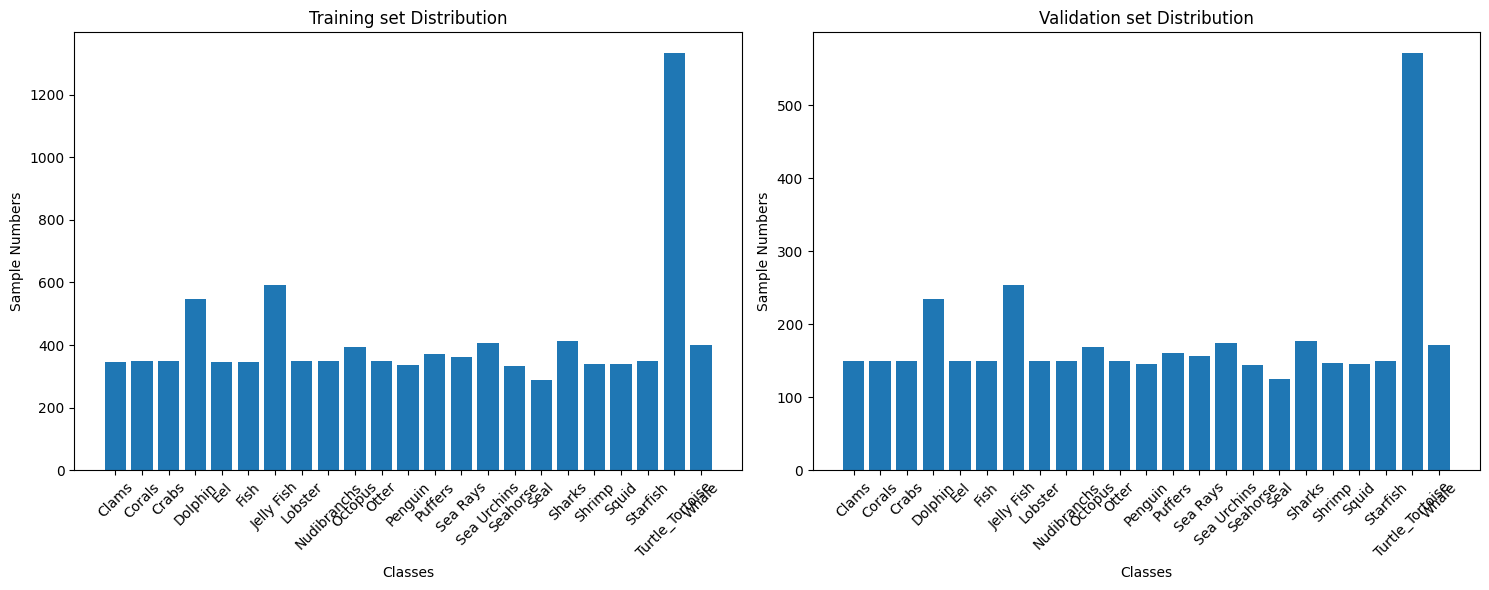

In [7]:
import matplotlib.pyplot as plt

# Eğitim seti sınıf dağılımı için bar grafik oluştur
plt.figure(figsize=(15, 6))

# Eğitim seti sınıf dağılımı için subplot 1
plt.subplot(1, 2, 1)
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.title('Training set Distribution')
plt.xlabel('Classes')
plt.ylabel('Sample Numbers')
plt.xticks(rotation=45)

# Doğrulama seti sınıf dağılımı için subplot 2
plt.subplot(1, 2, 2)
plt.bar(validation_class_counts.keys(), validation_class_counts.values())
plt.title('Validation set Distribution')
plt.xlabel('Classes')
plt.ylabel('Sample Numbers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

 it seems  balanced except few classes 

## Example Images from Dataset

#### Original Examples

In [8]:
# not augmented dataset
train_set,validation_set=prep_data(False)

images,labels=train_set.next()

class_names = train_set.class_indices
class_names = {v: k for k, v in class_names.items()}

Found 9588 images belonging to 23 classes.
Found 4123 images belonging to 23 classes.


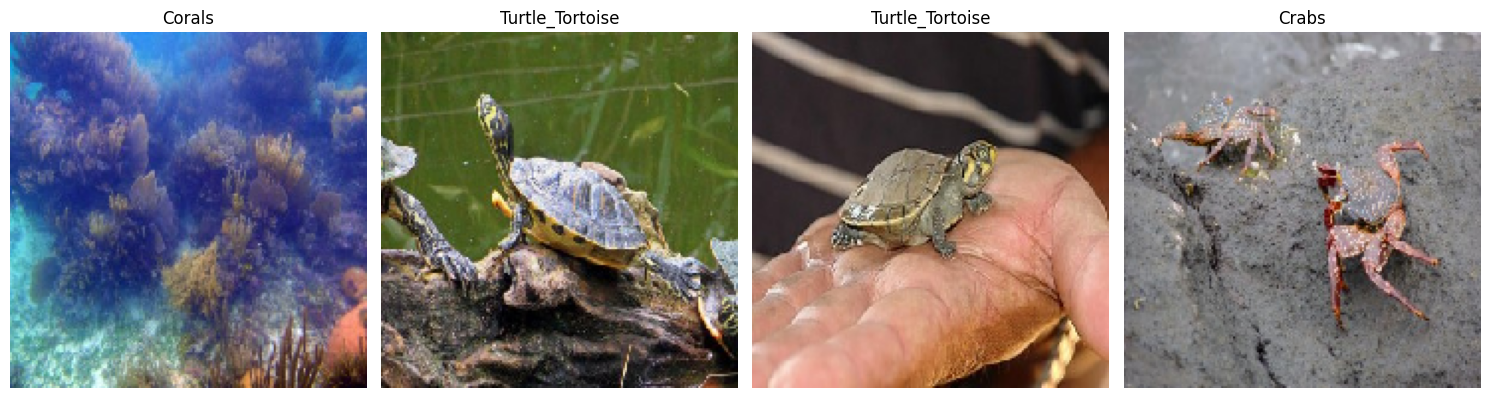

In [9]:
# for visualization
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    axes[i].imshow(images[i]) 
    label_index = int(labels[i])
    class_name = class_names[label_index]
    axes[i].set_title(f"{class_name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

#### Augmented Examples

In [10]:
#  augmented dataset
train_set,validation_set=prep_data(True)

images,labels=train_set.next()

class_names = train_set.class_indices
class_names = {v: k for k, v in class_names.items()}

Found 9588 images belonging to 23 classes.
Found 4123 images belonging to 23 classes.


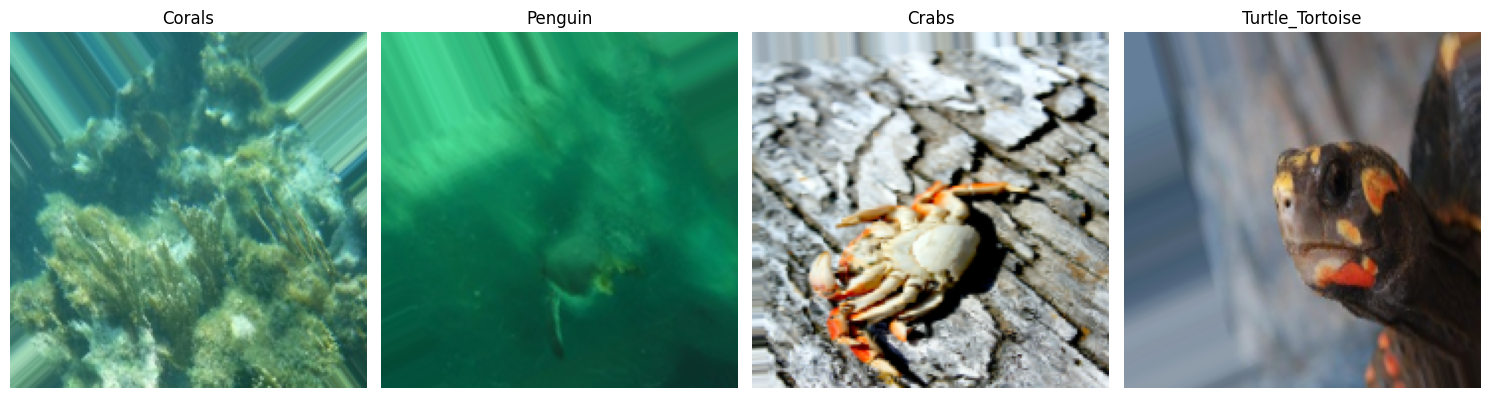

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    axes[i].imshow(images[i]) 
    label_index = int(labels[i])
    class_name = class_names[label_index]
    axes[i].set_title(f"{class_name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Models

Transfer Learning - Pretrained Models   : <br>
1. InceptionV3
2. Xception
3. MobileNet

In [8]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNet

# 1) InceptionV3 

### InceptionV3 Feature Extraction model1_1

In [24]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 9588 images belonging to 23 classes.
Found 4123 images belonging to 23 classes.


In [25]:
base_model = InceptionV3(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [26]:
# Freeze the layers except the last few layers
for layer in base_model.layers:
    layer.trainable = False

In [27]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(23, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005), 
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               4194432   
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dense_8 (Dense)             (None, 23)                5911      
                                                                 
Total params: 26,036,151
Trainable params: 4,233,367
Non-trainable params: 21,802,784
_________________________________________________________________


In [28]:
model1_1 = model.fit(
    train_set,
    epochs=35,
    validation_data=validation_set,
    )

Epoch 1/35
600/600 [==============================] - 72s 112ms/step - loss: 1.5523 - accuracy: 0.5508 - val_loss: 1.0782 - val_accuracy: 0.6745
Epoch 2/35
600/600 [==============================] - 65s 108ms/step - loss: 1.1847 - accuracy: 0.6432 - val_loss: 0.9755 - val_accuracy: 0.7138
Epoch 3/35
600/600 [==============================] - 72s 120ms/step - loss: 1.1055 - accuracy: 0.6694 - val_loss: 0.9918 - val_accuracy: 0.7177
Epoch 4/35
600/600 [==============================] - 71s 119ms/step - loss: 1.0391 - accuracy: 0.6874 - val_loss: 0.8977 - val_accuracy: 0.7385
Epoch 5/35
600/600 [==============================] - 61s 101ms/step - loss: 0.9933 - accuracy: 0.7009 - val_loss: 0.9843 - val_accuracy: 0.7145
Epoch 6/35
600/600 [==============================] - 61s 101ms/step - loss: 0.9621 - accuracy: 0.7105 - val_loss: 0.8840 - val_accuracy: 0.7422
Epoch 7/35
600/600 [==============================] - 61s 101ms/step - loss: 0.9096 - accuracy: 0.7252 - val_loss: 0.9042 - val_ac

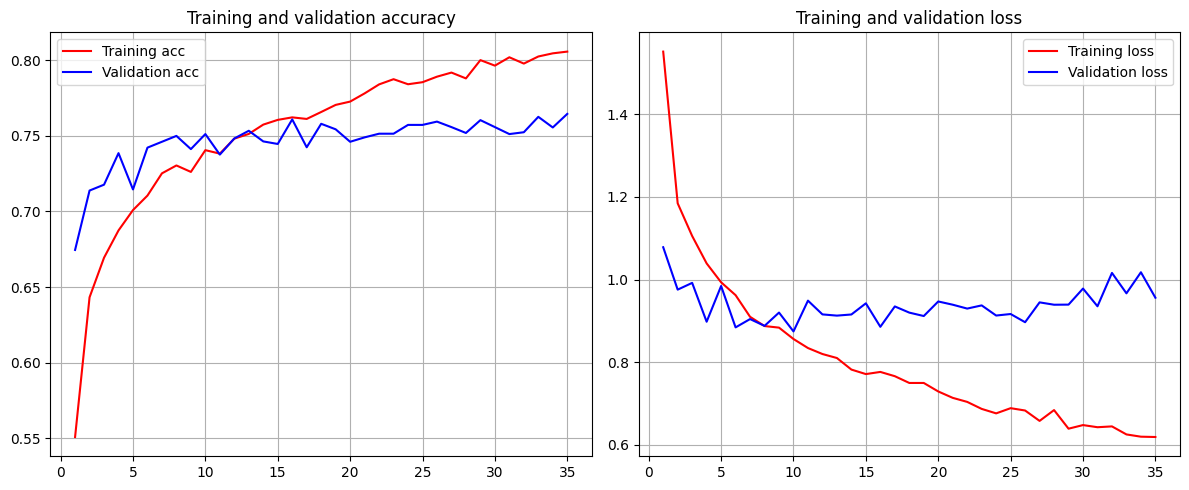

In [29]:
visualize(model1_1)

It clearly overfits , i will  add 2 dropout layers to prevent overfitting and i will decrease epoch number 

### InceptionV3 Feature Extraction model1_2

In [30]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 9588 images belonging to 23 classes.
Found 4123 images belonging to 23 classes.


In [31]:
base_model = InceptionV3(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [32]:
# Freeze the layers except the last few layers
for layer in base_model.layers:
    layer.trainable = False

In [33]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(23, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005), # 0.0002
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_9 (Dense)             (None, 128)               4194432   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 23)               

In [34]:
model1_2 = model.fit(
    train_set,
    epochs=50,
    validation_data=validation_set,
    )

Epoch 1/50
600/600 [==============================] - 70s 110ms/step - loss: 2.1760 - accuracy: 0.3846 - val_loss: 1.2841 - val_accuracy: 0.6292
Epoch 2/50
600/600 [==============================] - 67s 112ms/step - loss: 1.6830 - accuracy: 0.5166 - val_loss: 1.1378 - val_accuracy: 0.6716
Epoch 3/50
600/600 [==============================] - 65s 108ms/step - loss: 1.5232 - accuracy: 0.5610 - val_loss: 0.9991 - val_accuracy: 0.7097
Epoch 4/50
600/600 [==============================] - 63s 105ms/step - loss: 1.4459 - accuracy: 0.5922 - val_loss: 1.0292 - val_accuracy: 0.7019
Epoch 5/50
600/600 [==============================] - 62s 104ms/step - loss: 1.3562 - accuracy: 0.6148 - val_loss: 0.9643 - val_accuracy: 0.7213
Epoch 6/50
600/600 [==============================] - 63s 104ms/step - loss: 1.3288 - accuracy: 0.6241 - val_loss: 0.9223 - val_accuracy: 0.7393
Epoch 7/50
600/600 [==============================] - 63s 105ms/step - loss: 1.2780 - accuracy: 0.6357 - val_loss: 0.9411 - val_ac

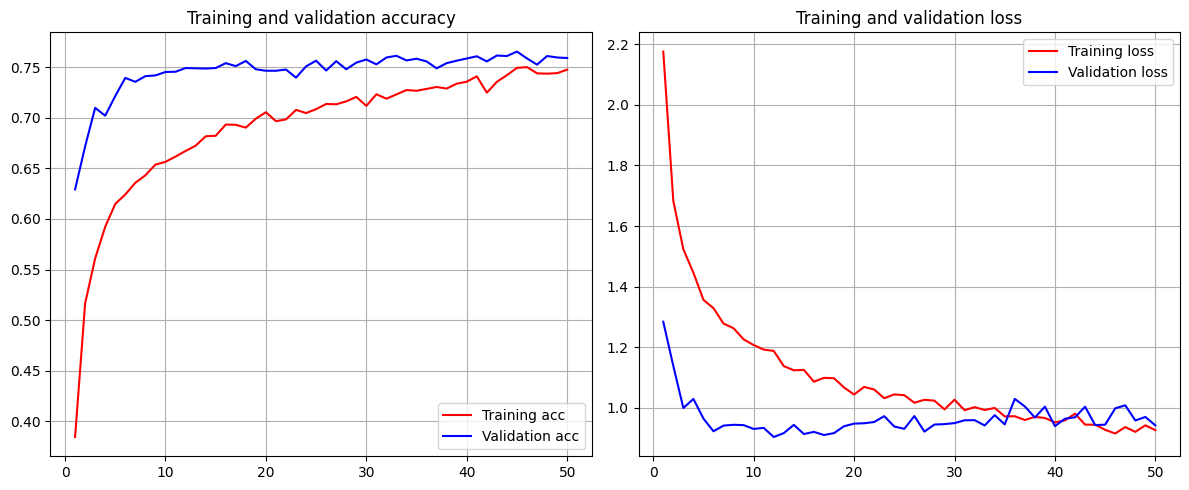

In [35]:
visualize(model1_2)

overfitting is prevented  but accuracy is not good enough 

## InceptionV3 Fine Tuning model 2_1

In [36]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 9588 images belonging to 23 classes.
Found 4123 images belonging to 23 classes.


In [37]:
base_model = InceptionV3(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_376 (Conv2D)            (None, 89, 89, 32)   864         ['input_5[0][0]']                
                                                                                                  
 batch_normalization_376 (Batch  (None, 89, 89, 32)  96          ['conv2d_376[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [38]:
# Freeze the layers except the last 15 layers
for layer in base_model.layers[:-15]:
    layer.trainable = False

In [39]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(23, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               4194432   
                                                                 
 dense_13 (Dense)            (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 23)                5911      
                                                                 
Total params: 26,036,151
Trainable params: 4,628,247
N

In [40]:
model2_1 = model.fit(
    train_set,
    epochs=30,
    validation_data=validation_set,
    )

Epoch 1/30
600/600 [==============================] - 72s 111ms/step - loss: 1.7051 - accuracy: 0.5112 - val_loss: 1.0411 - val_accuracy: 0.6973
Epoch 2/30
600/600 [==============================] - 64s 107ms/step - loss: 1.2840 - accuracy: 0.6234 - val_loss: 0.9405 - val_accuracy: 0.7262
Epoch 3/30
600/600 [==============================] - 70s 116ms/step - loss: 1.1695 - accuracy: 0.6564 - val_loss: 0.8896 - val_accuracy: 0.7458
Epoch 4/30
600/600 [==============================] - 72s 119ms/step - loss: 1.0968 - accuracy: 0.6745 - val_loss: 0.8630 - val_accuracy: 0.7475
Epoch 5/30
600/600 [==============================] - 67s 112ms/step - loss: 1.0308 - accuracy: 0.6901 - val_loss: 0.8693 - val_accuracy: 0.7550
Epoch 6/30
600/600 [==============================] - 64s 107ms/step - loss: 0.9976 - accuracy: 0.7039 - val_loss: 0.8462 - val_accuracy: 0.7565
Epoch 7/30
600/600 [==============================] - 64s 107ms/step - loss: 0.9401 - accuracy: 0.7190 - val_loss: 0.8317 - val_ac

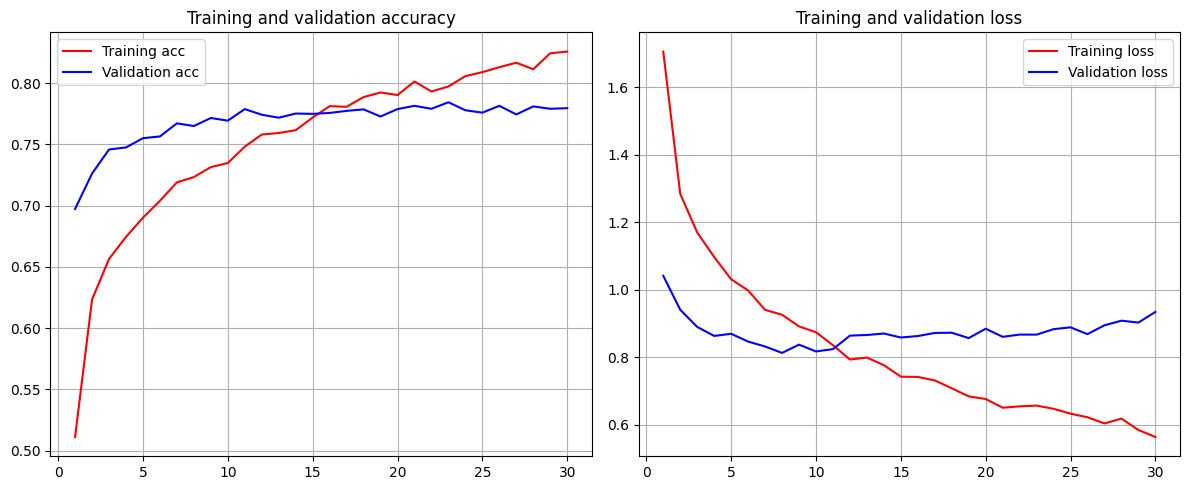

In [42]:
visualize(model2_1)

# 2. Xception 

## Xception Feature Extraction model3_1 

In [43]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 9588 images belonging to 23 classes.
Found 4123 images belonging to 23 classes.


In [44]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [45]:
# in this part i am gonna do feature extraction therefore i set layers to untrainable
for layer in base_model.layers:
     layer.trainable = False

In [46]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(23, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten_5 (Flatten)         (None, 73728)             0         
                                                                 
 dense_15 (Dense)            (None, 256)               18874624  
                                                                 
 dense_16 (Dense)            (None, 512)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 23)                11799     
                                                                 
Total params: 39,879,487
Trainable params: 19,018,007


In [47]:
model3_1 = model.fit(
    train_set,
    epochs=35,
    validation_data=validation_set,
    )

Epoch 1/35
600/600 [==============================] - 75s 118ms/step - loss: 1.6025 - accuracy: 0.5399 - val_loss: 0.9483 - val_accuracy: 0.7170
Epoch 2/35
600/600 [==============================] - 67s 112ms/step - loss: 1.2652 - accuracy: 0.6355 - val_loss: 0.9258 - val_accuracy: 0.7211
Epoch 3/35
600/600 [==============================] - 68s 113ms/step - loss: 1.1720 - accuracy: 0.6556 - val_loss: 0.9187 - val_accuracy: 0.7237
Epoch 4/35
600/600 [==============================] - 67s 111ms/step - loss: 1.1186 - accuracy: 0.6729 - val_loss: 0.8469 - val_accuracy: 0.7465
Epoch 5/35
600/600 [==============================] - 68s 113ms/step - loss: 1.0623 - accuracy: 0.6918 - val_loss: 0.8430 - val_accuracy: 0.7524
Epoch 6/35
600/600 [==============================] - 68s 114ms/step - loss: 1.0212 - accuracy: 0.7020 - val_loss: 0.9167 - val_accuracy: 0.7351
Epoch 7/35
600/600 [==============================] - 68s 113ms/step - loss: 0.9833 - accuracy: 0.7078 - val_loss: 0.8482 - val_ac

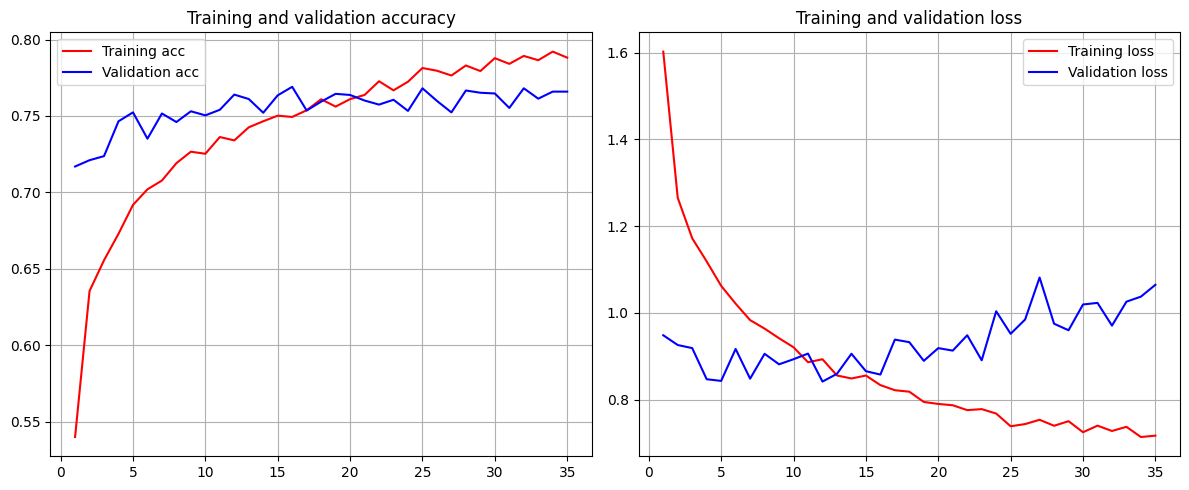

In [48]:
visualize(model3_1)

## Xception Fine Tuning Model 4_1

In [49]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 9588 images belonging to 23 classes.
Found 4123 images belonging to 23 classes.


In [50]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [51]:
# in this part i am gonna do feature extraction therefore i set layers to untrainable
for layer in base_model.layers[:-25]:
     layer.trainable = False

base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 89, 89, 32)   864         ['input_7[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 89, 89, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [52]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(23, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten_6 (Flatten)         (None, 73728)             0         
                                                                 
 dense_18 (Dense)            (None, 64)                4718656   
                                                                 
 dense_19 (Dense)            (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 23)                2967      
                                                                 
Total params: 25,591,423
Trainable params: 13,132,303


In [53]:
model4_1 = model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    )

Epoch 1/20
600/600 [==============================] - 72s 114ms/step - loss: 1.8291 - accuracy: 0.4792 - val_loss: 1.0318 - val_accuracy: 0.7085
Epoch 2/20
600/600 [==============================] - 71s 117ms/step - loss: 1.2509 - accuracy: 0.6421 - val_loss: 0.8824 - val_accuracy: 0.7521
Epoch 3/20
600/600 [==============================] - 70s 116ms/step - loss: 1.0468 - accuracy: 0.7025 - val_loss: 0.8350 - val_accuracy: 0.7676
Epoch 4/20
600/600 [==============================] - 72s 120ms/step - loss: 0.9398 - accuracy: 0.7317 - val_loss: 0.8037 - val_accuracy: 0.7803
Epoch 5/20
600/600 [==============================] - 70s 117ms/step - loss: 0.8401 - accuracy: 0.7567 - val_loss: 0.7805 - val_accuracy: 0.7892
Epoch 6/20
600/600 [==============================] - 70s 116ms/step - loss: 0.7709 - accuracy: 0.7762 - val_loss: 0.7694 - val_accuracy: 0.7965
Epoch 7/20
600/600 [==============================] - 73s 121ms/step - loss: 0.6926 - accuracy: 0.8016 - val_loss: 0.7929 - val_ac

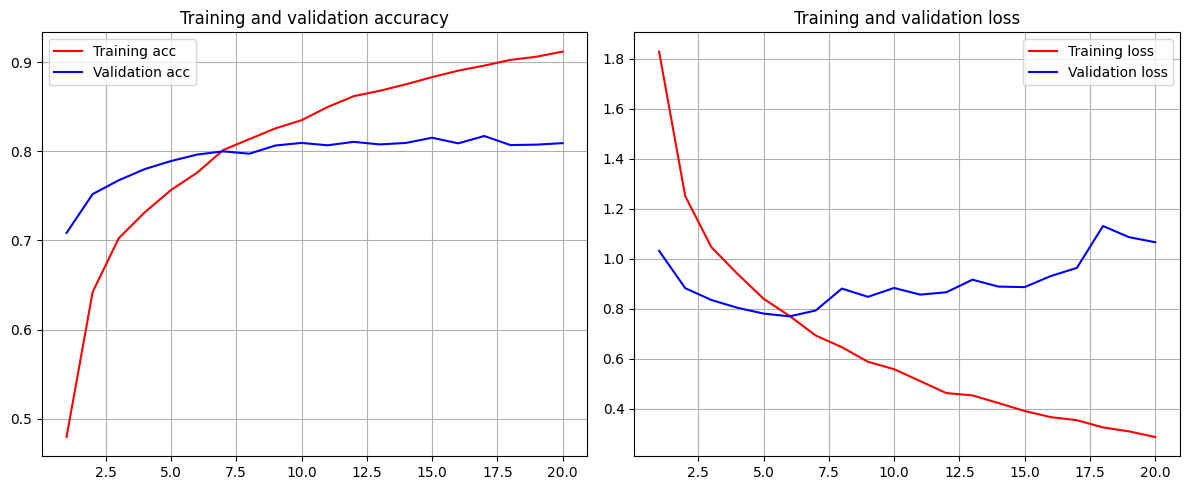

In [54]:
visualize(model4_1)

In [55]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 9588 images belonging to 23 classes.
Found 4123 images belonging to 23 classes.


In [56]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [57]:
# in this part i am gonna do feature extraction therefore i set layers to untrainable
for layer in base_model.layers[:-25]:
     layer.trainable = False

base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 89, 89, 32)   864         ['input_8[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 89, 89, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [58]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(23, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten_7 (Flatten)         (None, 73728)             0         
                                                                 
 dense_21 (Dense)            (None, 64)                4718656   
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 128)               8320      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 23)               

In [60]:
model4_2 = model.fit(
    train_set,
    epochs=15,
    validation_data=validation_set,
    )

Epoch 1/15
600/600 [==============================] - 77s 121ms/step - loss: 2.2845 - accuracy: 0.3500 - val_loss: 1.2973 - val_accuracy: 0.6449
Epoch 2/15
600/600 [==============================] - 71s 118ms/step - loss: 1.6838 - accuracy: 0.5322 - val_loss: 1.0239 - val_accuracy: 0.7279
Epoch 3/15
600/600 [==============================] - 72s 120ms/step - loss: 1.4229 - accuracy: 0.6091 - val_loss: 0.8974 - val_accuracy: 0.7536
Epoch 4/15
600/600 [==============================] - 72s 121ms/step - loss: 1.2636 - accuracy: 0.6514 - val_loss: 0.8371 - val_accuracy: 0.7713
Epoch 5/15
600/600 [==============================] - 71s 119ms/step - loss: 1.1397 - accuracy: 0.6824 - val_loss: 0.8425 - val_accuracy: 0.7718
Epoch 6/15
600/600 [==============================] - 72s 120ms/step - loss: 1.0423 - accuracy: 0.7110 - val_loss: 0.8200 - val_accuracy: 0.7897
Epoch 7/15
600/600 [==============================] - 73s 122ms/step - loss: 0.9680 - accuracy: 0.7379 - val_loss: 0.8117 - val_ac

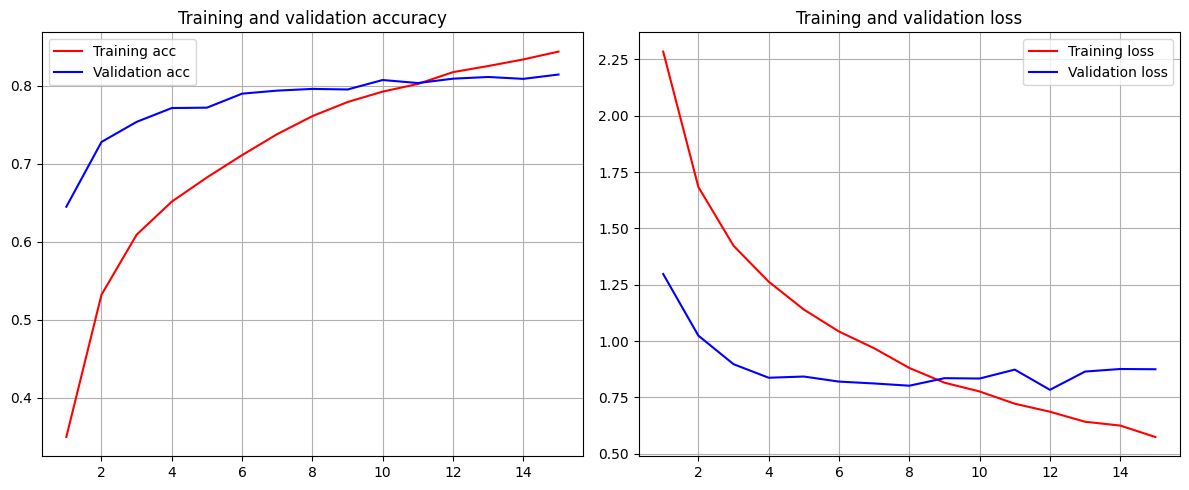

In [61]:
visualize(model4_2)

## Xception Fine Tuning Model 4_3

In [62]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 9588 images belonging to 23 classes.
Found 4123 images belonging to 23 classes.


In [63]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [64]:
# in this part i am gonna do feature extraction therefore i set layers to untrainable
for layer in base_model.layers[:-25]:
     layer.trainable = False

In [65]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.45))
model.add(layers.Dense(23, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.000005),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten_8 (Flatten)         (None, 73728)             0         
                                                                 
 dense_24 (Dense)            (None, 128)               9437312   
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               33024     
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 23)               

In [67]:
model4_3 = model.fit(
    train_set,
    epochs=80,
    validation_data=validation_set,
    )

Epoch 1/80
600/600 [==============================] - 80s 126ms/step - loss: 2.8668 - accuracy: 0.1813 - val_loss: 2.2572 - val_accuracy: 0.4334
Epoch 2/80
600/600 [==============================] - 75s 125ms/step - loss: 2.3407 - accuracy: 0.3433 - val_loss: 1.7225 - val_accuracy: 0.5860
Epoch 3/80
600/600 [==============================] - 75s 126ms/step - loss: 2.0547 - accuracy: 0.4196 - val_loss: 1.4288 - val_accuracy: 0.6364
Epoch 4/80
600/600 [==============================] - 75s 125ms/step - loss: 1.8745 - accuracy: 0.4679 - val_loss: 1.2681 - val_accuracy: 0.6629
Epoch 5/80
600/600 [==============================] - 71s 119ms/step - loss: 1.7388 - accuracy: 0.5020 - val_loss: 1.1634 - val_accuracy: 0.6842
Epoch 6/80
600/600 [==============================] - 71s 119ms/step - loss: 1.6173 - accuracy: 0.5345 - val_loss: 1.0757 - val_accuracy: 0.7089
Epoch 7/80
600/600 [==============================] - 71s 118ms/step - loss: 1.5683 - accuracy: 0.5499 - val_loss: 1.0163 - val_ac

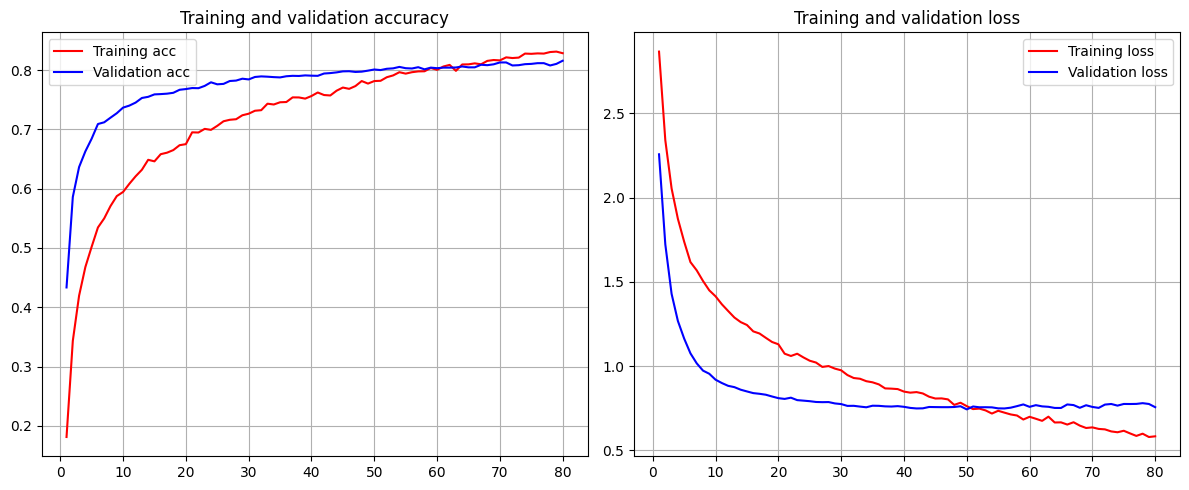

In [70]:
visualize(model4_3)

curves seems good for now , there is no overfitting and accuracy is around 82 <br> accuracy: 0.8283 -  - val_accuracy: 0.8157

## Xception Fine Tuning Model 4_4

In [76]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 9588 images belonging to 23 classes.
Found 4123 images belonging to 23 classes.


In [77]:
base_model = Xception(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [78]:
# in this part i am gonna do feature extraction therefore i set layers to untrainable
for layer in base_model.layers[:-50]:
     layer.trainable = False

In [79]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(23, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.000005),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 flatten_10 (Flatten)        (None, 73728)             0         
                                                                 
 dense_30 (Dense)            (None, 256)               18874624  
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_31 (Dense)            (None, 512)               131584    
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_32 (Dense)            (None, 23)              

In [81]:
model4_4 = model.fit(
    train_set,
    epochs=60,
    validation_data=validation_set,
    )

Epoch 1/60
600/600 [==============================] - 84s 133ms/step - loss: 2.9352 - accuracy: 0.1726 - val_loss: 2.4029 - val_accuracy: 0.3730
Epoch 2/60
600/600 [==============================] - 82s 137ms/step - loss: 2.4225 - accuracy: 0.3271 - val_loss: 1.8482 - val_accuracy: 0.5113
Epoch 3/60
600/600 [==============================] - 77s 128ms/step - loss: 2.1004 - accuracy: 0.4034 - val_loss: 1.5509 - val_accuracy: 0.5918
Epoch 4/60
600/600 [==============================] - 76s 126ms/step - loss: 1.9229 - accuracy: 0.4499 - val_loss: 1.3486 - val_accuracy: 0.6408
Epoch 5/60
600/600 [==============================] - 76s 126ms/step - loss: 1.7824 - accuracy: 0.4874 - val_loss: 1.2068 - val_accuracy: 0.6774
Epoch 6/60
600/600 [==============================] - 75s 126ms/step - loss: 1.6794 - accuracy: 0.5207 - val_loss: 1.0995 - val_accuracy: 0.6992
Epoch 7/60
600/600 [==============================] - 77s 128ms/step - loss: 1.5821 - accuracy: 0.5456 - val_loss: 1.0351 - val_ac

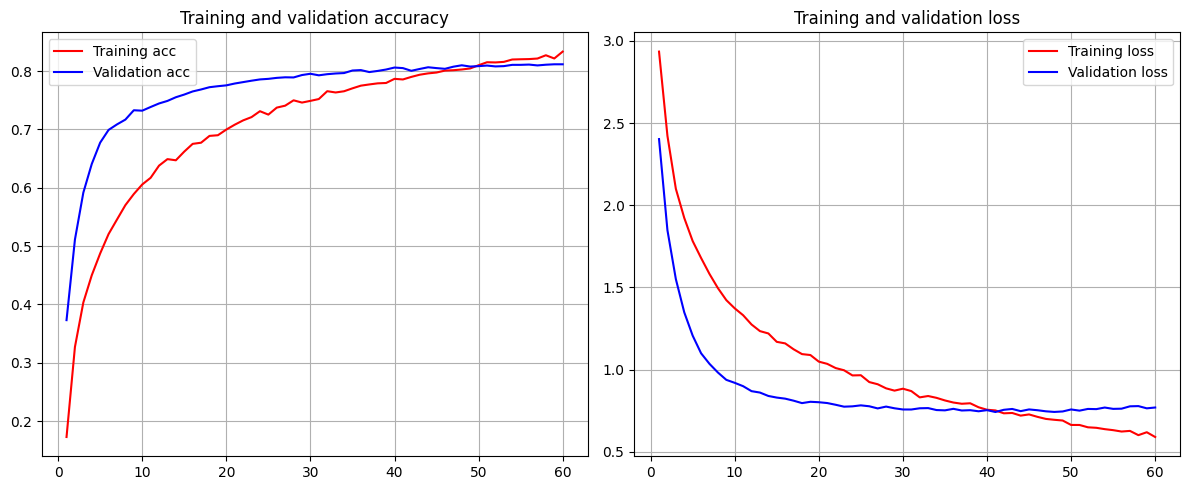

In [82]:
visualize(model4_4)

## MobileNet Feature Extraction Model 5_1

In [83]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 9588 images belonging to 23 classes.
Found 4123 images belonging to 23 classes.


In [84]:
base_model = MobileNet(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [85]:
# in this part i am gonna do feature extraction therefore i set layers to untrainable
for layer in base_model.layers:
     layer.trainable = False

In [86]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(23, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0002),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 5, 5, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 25600)             0         
                                                                 
 dense_33 (Dense)            (None, 64)                1638464   
                                                                 
 dense_34 (Dense)            (None, 128)               8320      
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_35 (Dense)            (None, 23)                2967      
                                                     

In [88]:
model5_1 = model.fit(
    train_set,
    epochs=30,
    validation_data=validation_set,
    )

Epoch 1/30
600/600 [==============================] - 67s 108ms/step - loss: 2.3513 - accuracy: 0.3236 - val_loss: 1.5567 - val_accuracy: 0.5232
Epoch 2/30
600/600 [==============================] - 69s 115ms/step - loss: 1.7510 - accuracy: 0.4796 - val_loss: 1.3257 - val_accuracy: 0.5661
Epoch 3/30
600/600 [==============================] - 60s 100ms/step - loss: 1.5572 - accuracy: 0.5379 - val_loss: 1.2742 - val_accuracy: 0.6025
Epoch 4/30
600/600 [==============================] - 60s 99ms/step - loss: 1.4302 - accuracy: 0.5713 - val_loss: 1.1358 - val_accuracy: 0.6575
Epoch 5/30
600/600 [==============================] - 62s 104ms/step - loss: 1.3386 - accuracy: 0.6089 - val_loss: 1.1094 - val_accuracy: 0.6837
Epoch 6/30
600/600 [==============================] - 66s 111ms/step - loss: 1.2272 - accuracy: 0.6450 - val_loss: 1.1022 - val_accuracy: 0.7002
Epoch 7/30
600/600 [==============================] - 63s 105ms/step - loss: 1.1778 - accuracy: 0.6556 - val_loss: 1.0569 - val_acc

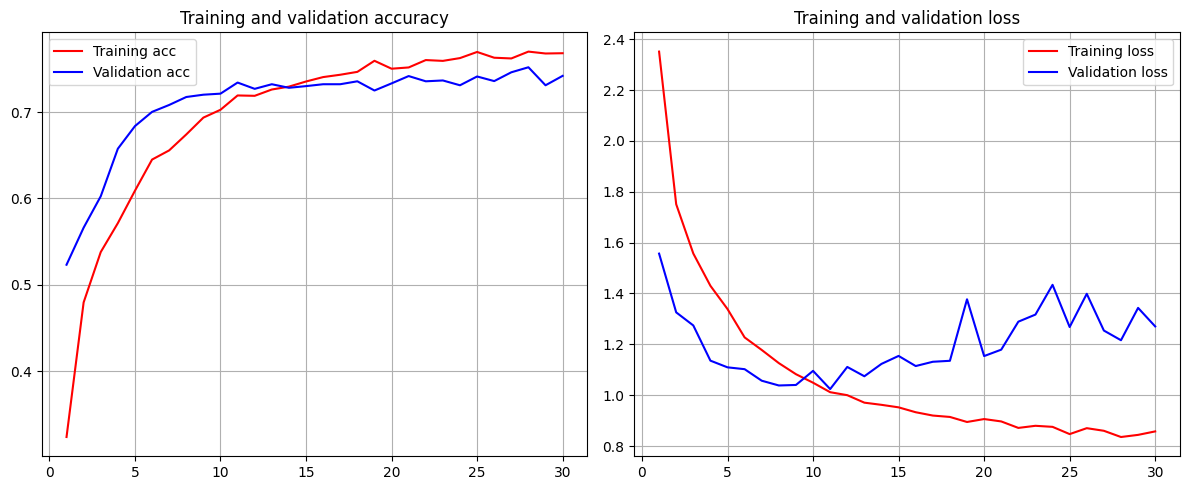

In [89]:
visualize(model5_1)

##  MobileNet Feature Extraction 5_2

In [90]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 9588 images belonging to 23 classes.
Found 4123 images belonging to 23 classes.


In [91]:
base_model = MobileNet(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [92]:
# in this part i am gonna do feature extraction therefore i set layers to untrainable
for layer in base_model.layers:
     layer.trainable = False

In [93]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(23, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 5, 5, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 25600)             0         
                                                                 
 dense_36 (Dense)            (None, 128)               3276928   
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 256)               33024     
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                     

In [94]:
model5_2 = model.fit(
    train_set,
    epochs=40,
    validation_data=validation_set,
    )

Epoch 1/40
600/600 [==============================] - 74s 120ms/step - loss: 2.3659 - accuracy: 0.3306 - val_loss: 1.4174 - val_accuracy: 0.5836
Epoch 2/40
600/600 [==============================] - 68s 113ms/step - loss: 1.7478 - accuracy: 0.4916 - val_loss: 1.1087 - val_accuracy: 0.6714
Epoch 3/40
600/600 [==============================] - 71s 118ms/step - loss: 1.5312 - accuracy: 0.5587 - val_loss: 0.9747 - val_accuracy: 0.7148
Epoch 4/40
600/600 [==============================] - 65s 108ms/step - loss: 1.4140 - accuracy: 0.5912 - val_loss: 0.9492 - val_accuracy: 0.7315
Epoch 5/40
600/600 [==============================] - 68s 114ms/step - loss: 1.3102 - accuracy: 0.6241 - val_loss: 0.9585 - val_accuracy: 0.7342
Epoch 6/40
600/600 [==============================] - 66s 111ms/step - loss: 1.2541 - accuracy: 0.6397 - val_loss: 0.9225 - val_accuracy: 0.7448
Epoch 7/40
600/600 [==============================] - 60s 101ms/step - loss: 1.2175 - accuracy: 0.6572 - val_loss: 0.9551 - val_ac

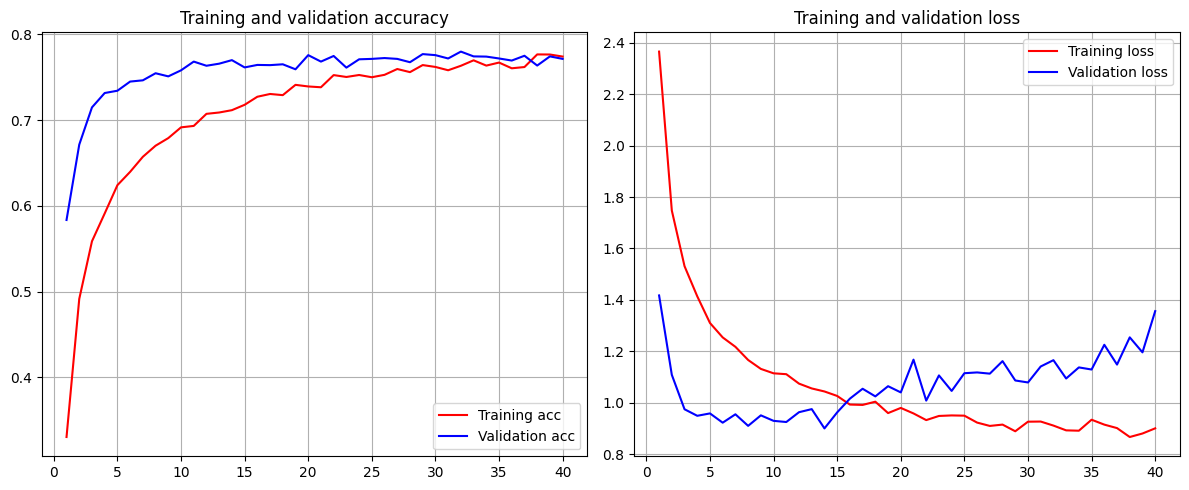

In [95]:
visualize(model5_2)

accuracy: 0.7950 - - val_accuracy: 0.7951

## MobileNet Fine Tuning Model 5_3

In [9]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 9588 images belonging to 23 classes.
Found 4123 images belonging to 23 classes.


In [10]:
base_model = MobileNet(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [11]:
# in this part i am gonna do feature extraction therefore i set layers to untrainable
for layer in base_model.layers[:-30]:
     layer.trainable = False

In [12]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(23, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00002),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 5, 5, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 128)               3276928   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

In [13]:
model5_3 = model.fit(
    train_set,
    epochs=60,
    validation_data=validation_set,
    )

Epoch 1/60
600/600 [==============================] - 80s 120ms/step - loss: 2.8199 - accuracy: 0.1986 - val_loss: 1.8825 - val_accuracy: 0.4594
Epoch 2/60
600/600 [==============================] - 60s 100ms/step - loss: 2.1626 - accuracy: 0.3795 - val_loss: 1.4389 - val_accuracy: 0.5785
Epoch 3/60
600/600 [==============================] - 59s 99ms/step - loss: 1.8386 - accuracy: 0.4666 - val_loss: 1.2052 - val_accuracy: 0.6486
Epoch 4/60
600/600 [==============================] - 59s 99ms/step - loss: 1.6504 - accuracy: 0.5215 - val_loss: 1.0609 - val_accuracy: 0.6874
Epoch 5/60
600/600 [==============================] - 61s 101ms/step - loss: 1.5525 - accuracy: 0.5459 - val_loss: 0.9924 - val_accuracy: 0.7085
Epoch 6/60
600/600 [==============================] - 64s 107ms/step - loss: 1.4309 - accuracy: 0.5812 - val_loss: 0.9440 - val_accuracy: 0.7245
Epoch 7/60
600/600 [==============================] - 64s 107ms/step - loss: 1.3489 - accuracy: 0.6057 - val_loss: 0.8862 - val_accu

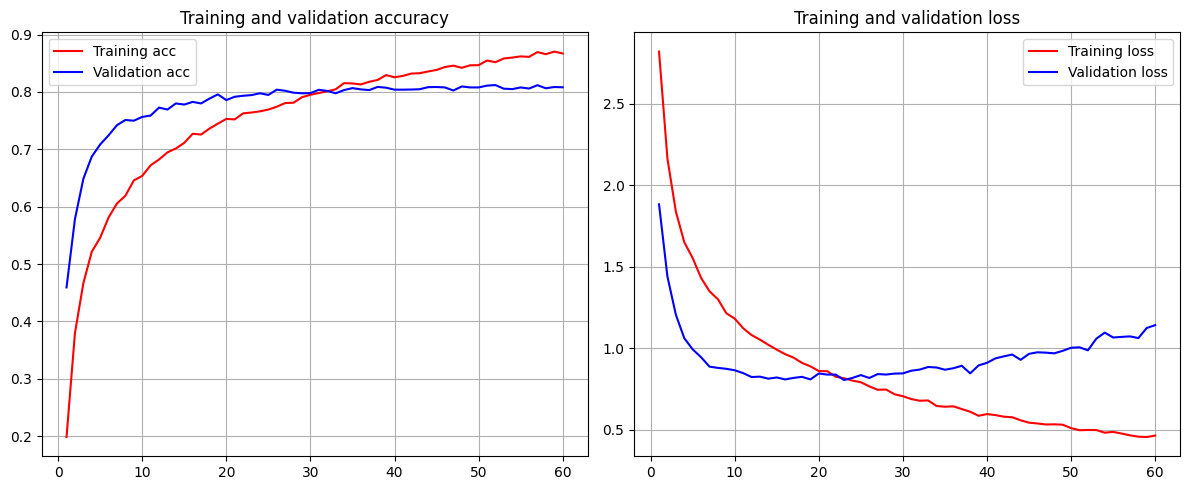

In [14]:
visualize(model5_3)

## MobileNet Fine Tuning Model 5_4

In [18]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 9588 images belonging to 23 classes.
Found 4123 images belonging to 23 classes.


In [19]:
base_model = MobileNet(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [20]:
# in this part i am gonna do feature extraction therefore i set layers to untrainable
for layer in base_model.layers[:-45]:
     layer.trainable = False

In [21]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(23, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00002),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 5, 5, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 25600)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               3276928   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                      

In [22]:
model5_4 = model.fit(
    train_set,
    epochs=50,
    validation_data=validation_set,
    )

Epoch 1/50
600/600 [==============================] - 72s 115ms/step - loss: 3.0052 - accuracy: 0.1653 - val_loss: 2.2253 - val_accuracy: 0.3624
Epoch 2/50
600/600 [==============================] - 65s 108ms/step - loss: 2.4327 - accuracy: 0.3120 - val_loss: 1.7977 - val_accuracy: 0.4628
Epoch 3/50
600/600 [==============================] - 61s 102ms/step - loss: 2.1669 - accuracy: 0.3698 - val_loss: 1.5358 - val_accuracy: 0.5474
Epoch 4/50
600/600 [==============================] - 59s 99ms/step - loss: 1.9865 - accuracy: 0.4252 - val_loss: 1.3639 - val_accuracy: 0.6010
Epoch 5/50
600/600 [==============================] - 59s 99ms/step - loss: 1.8544 - accuracy: 0.4610 - val_loss: 1.2354 - val_accuracy: 0.6362
Epoch 6/50
600/600 [==============================] - 65s 109ms/step - loss: 1.7523 - accuracy: 0.4852 - val_loss: 1.1236 - val_accuracy: 0.6646
Epoch 7/50
600/600 [==============================] - 63s 105ms/step - loss: 1.6433 - accuracy: 0.5202 - val_loss: 1.0424 - val_accu

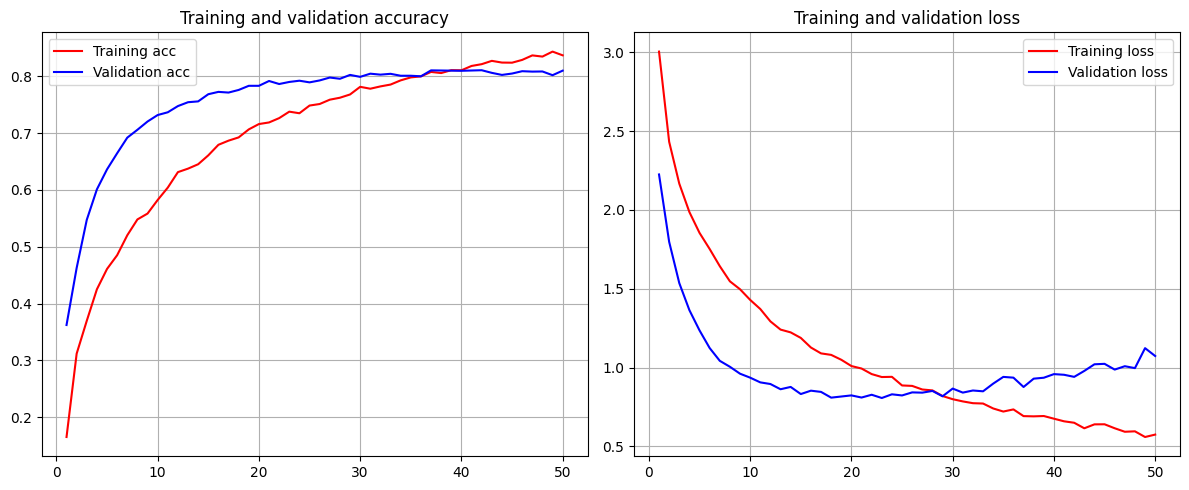

In [23]:
visualize(model5_4)

## MobileNet Fine Tuning Model 5_5

In [24]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 9588 images belonging to 23 classes.
Found 4123 images belonging to 23 classes.


In [25]:
base_model = MobileNet(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [26]:
# in this part i am gonna do feature extraction therefore i set layers to untrainable
for layer in base_model.layers[:-60]:
     layer.trainable = False

In [27]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(23, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 5, 5, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 25600)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               6553856   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                      

In [28]:
model5_5 = model.fit(
    train_set,
    epochs=60,
    validation_data=validation_set,
    )

Epoch 1/60
600/600 [==============================] - 66s 104ms/step - loss: 3.0664 - accuracy: 0.1611 - val_loss: 2.1913 - val_accuracy: 0.3934
Epoch 2/60
600/600 [==============================] - 63s 105ms/step - loss: 2.3874 - accuracy: 0.3279 - val_loss: 1.6813 - val_accuracy: 0.5101
Epoch 3/60
600/600 [==============================] - 70s 116ms/step - loss: 2.0571 - accuracy: 0.4040 - val_loss: 1.3871 - val_accuracy: 0.5836
Epoch 4/60
600/600 [==============================] - 61s 102ms/step - loss: 1.8700 - accuracy: 0.4525 - val_loss: 1.2241 - val_accuracy: 0.6369
Epoch 5/60
600/600 [==============================] - 61s 102ms/step - loss: 1.6984 - accuracy: 0.4983 - val_loss: 1.1049 - val_accuracy: 0.6680
Epoch 6/60
600/600 [==============================] - 60s 101ms/step - loss: 1.5980 - accuracy: 0.5257 - val_loss: 1.0304 - val_accuracy: 0.6893
Epoch 7/60
600/600 [==============================] - 60s 100ms/step - loss: 1.5065 - accuracy: 0.5552 - val_loss: 0.9754 - val_ac

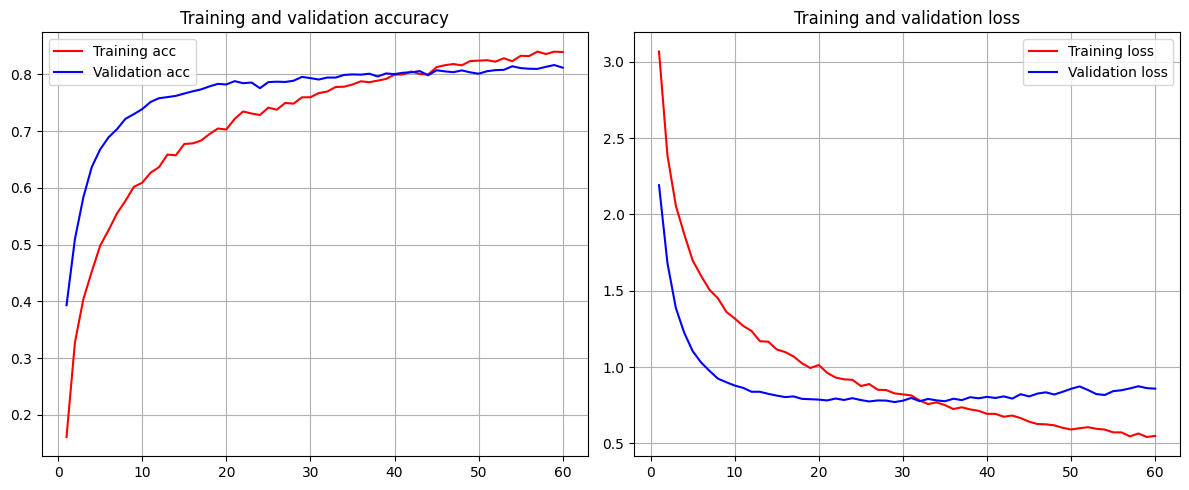

In [29]:
visualize(model5_5)